In [150]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
fields = ["username","date","retweets","favorites","text","geo","mentions","hashtags","id","permalink"]
volume_data = pd.read_csv("data/mix/Per Period/2018_part1.csv")

B:\SCHOOL\MasterThesis\PredictorApp\venv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3,4,6,9,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


ValueError: time data '2018-01-01 00:00:00' does not match format '%d/%m/%Y %H:%M' (match)

In [152]:
data = volume_data
data = data.sort_values(by='date')
data = data[["date"]]

In [153]:
data = data.set_index("date")
data.index = pd.to_datetime(data.index,format='%d/%m/%Y %H:%M')

ValueError: time data '2018-01-01 00:00:00' does not match format '%d/%m/%Y %H:%M' (match)

In [ ]:
grouped_data = data.groupby(pd.Grouper(freq="60Min")).size().reset_index(name='tweet_vol')

In [ ]:
plt.close()
grouped_data.plot(x='date')
plt.show()



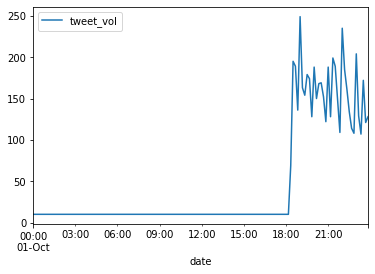

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-01.csv
(6445, 11)


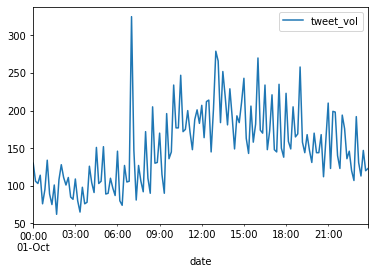

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-01_new.csv
(21758, 21)


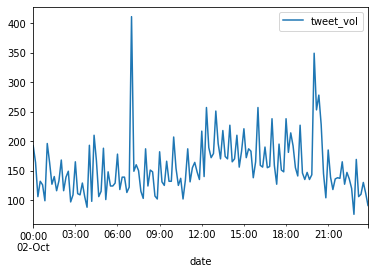

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-02.csv
(22602, 11)


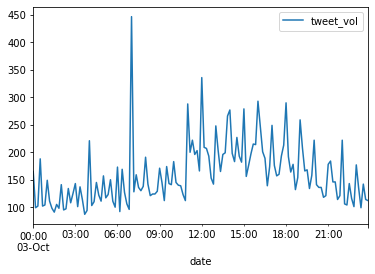

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-03.csv
(23034, 11)


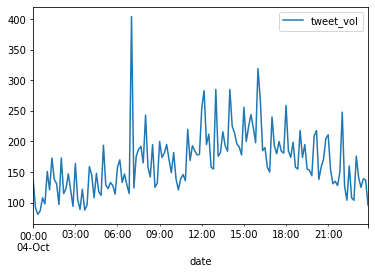

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-04.csv
(24031, 11)


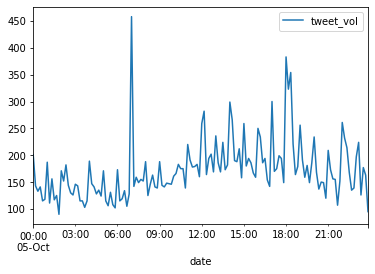

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-05.csv
(24823, 11)


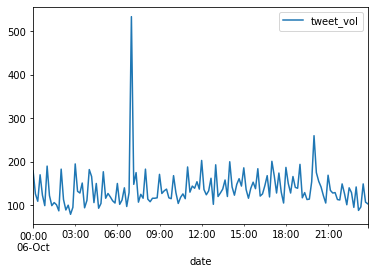

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-06.csv
(19850, 11)


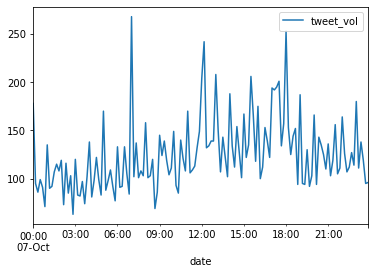

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-07.csv
(17991, 11)


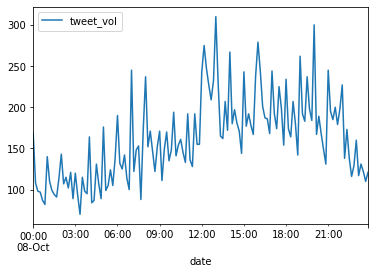

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-08.csv
(23259, 11)


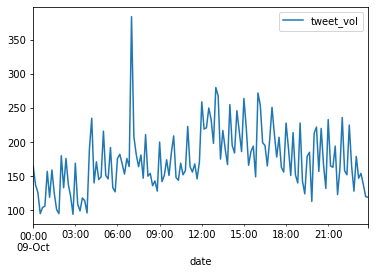

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-09.csv
(24960, 11)


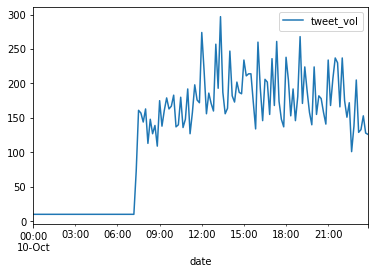

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-10.csv
(18158, 11)


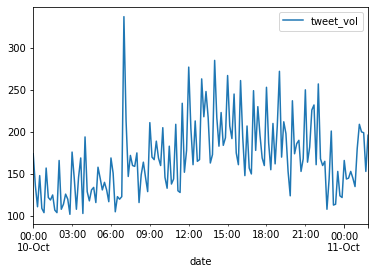

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-10_new.csv
(26427, 21)


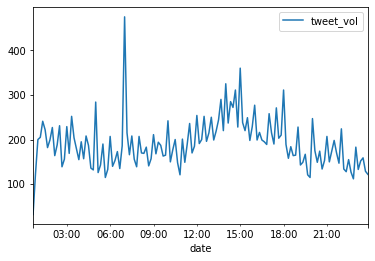

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-11.csv
(26775, 11)


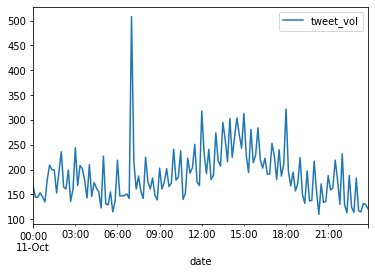

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-11_new.csv
(27227, 21)


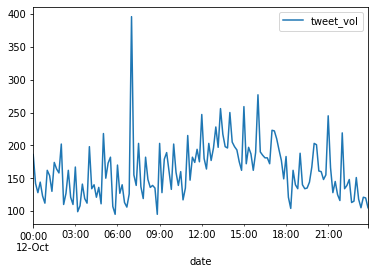

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-12.csv
(23339, 11)


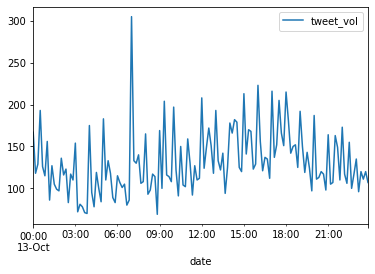

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-13.csv
(18902, 11)


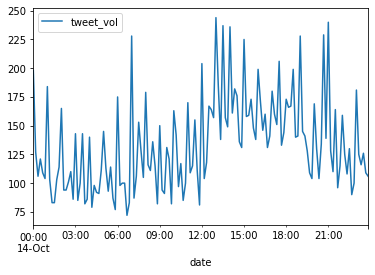

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-14.csv
(19295, 11)


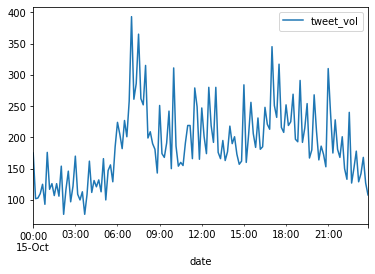

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-15.csv
(27170, 11)


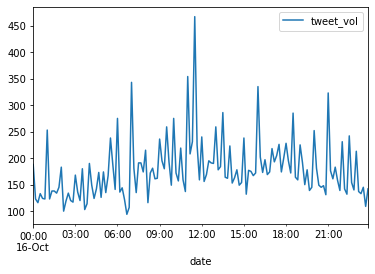

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-16.csv
(25573, 11)


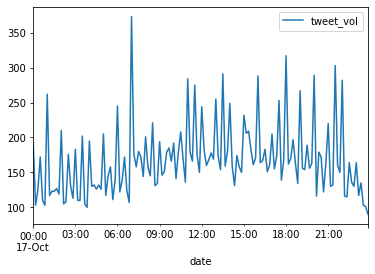

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-17.csv
(24143, 11)


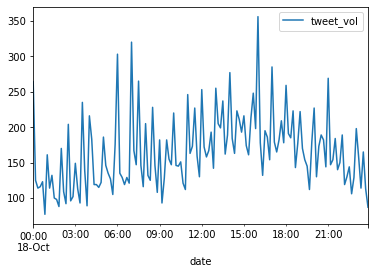

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-18.csv
(23866, 11)


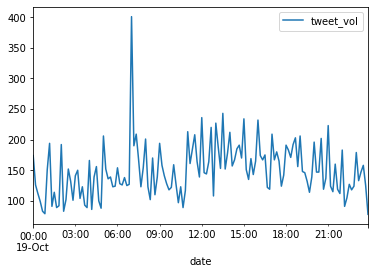

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-19.csv
(21576, 11)


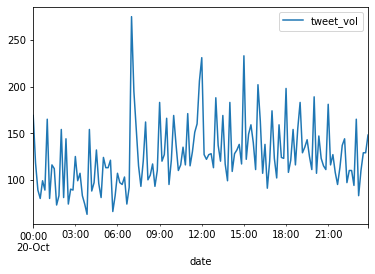

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-20.csv
(18152, 11)


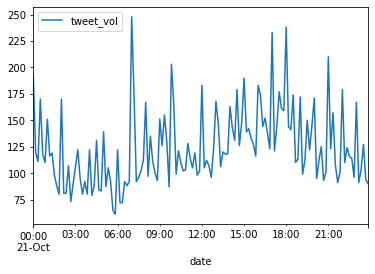

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-21.csv
(17836, 11)


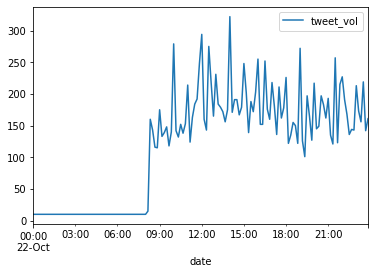

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-22.csv
(17039, 11)


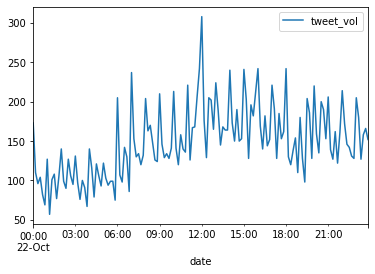

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-22_new.csv
(21450, 21)


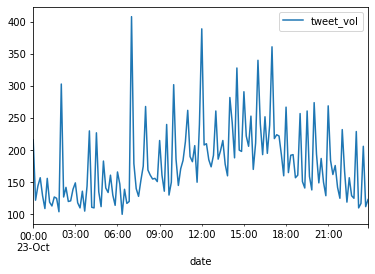

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-23.csv
(26015, 11)


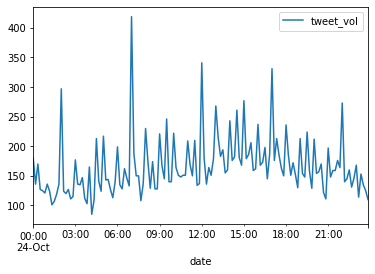

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-24.csv
(23893, 11)


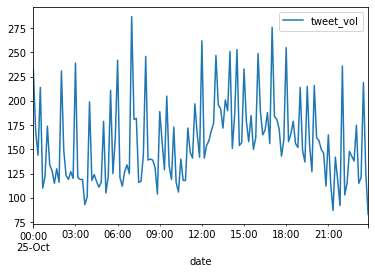

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-25.csv
(22752, 11)


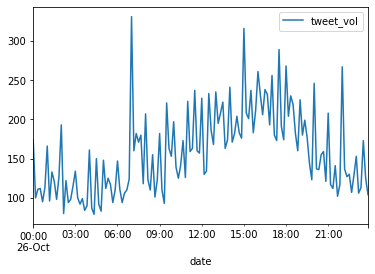

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-26.csv
(22827, 11)


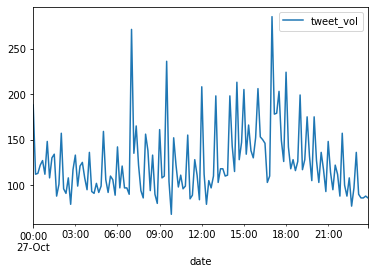

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-27.csv
(18077, 11)


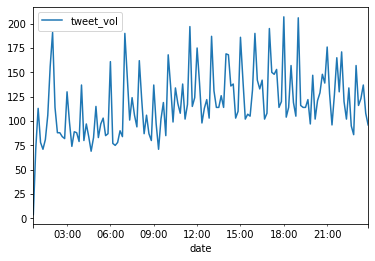

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-28.csv
(16602, 11)


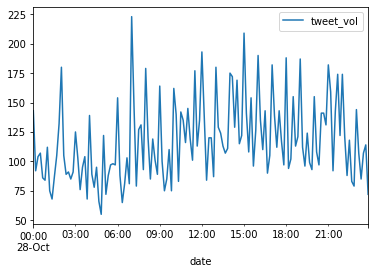

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-28_new.csv
(16952, 21)


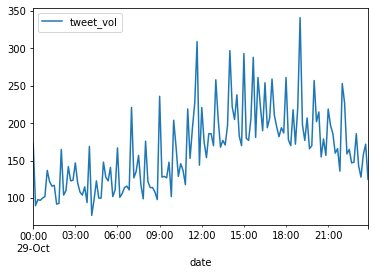

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-29.csv
(23722, 11)


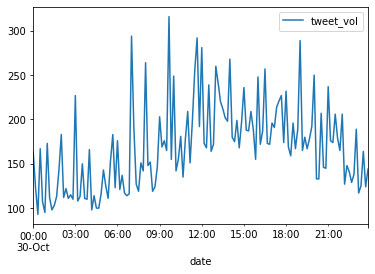

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-30.csv
(24372, 11)


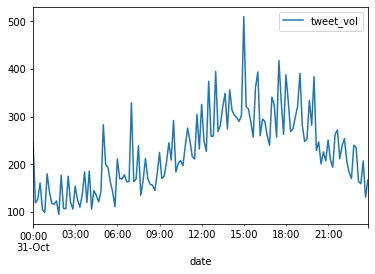

data/mix/Raw/18/PART 2 complete/10 2018\2018-10-31.csv
(32597, 11)


In [14]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os

filelist = []
root_path = "data/mix/Raw/18/PART 2 complete/11 2018"
#root_path = "data/mix/Raw/19/Enero 2019"

for roots, dirs, files in os.walk(root_path):
    for file in files:
        filelist.append(os.path.join(roots, file))

for file_path in filelist:
    try:
        volume_data = pd.read_csv(file_path, sep=";")
    except:
        volume_data = pd.read_csv(file_path, lineterminator="\n")
    volume_data = volume_data.sort_values(by='date')
    volume_data['weight'] = 1
    try:
        volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M:%S')
    except:
        try:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M')
        except:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%Y-%m-%d %H:%M:%S')
    volume_data = volume_data.set_index("date")

    grouped_data = volume_data.groupby(pd.Grouper(freq="10Min")).size().reset_index(name='tweet_vol')
    plt.close()
    grouped_data.plot(x='date')
    plt.show()

    print(file_path)
    print(volume_data.shape)

In [ ]:
grouped_data.plot(x='date')
plt.show()


In [14]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os
start_date = datetime.datetime(2018, 2, 1, 0, 0, 0, 0, datetime.timezone.utc)
end_date = datetime.datetime(2018, 3, 1, 23, 0, 0, 0, datetime.timezone.utc)

volume_data = pd.read_csv("data/TweetsBTC_16mil/peryear/18.csv", lineterminator="\n")
volume_data = volume_data.sort_values(by='date')

volume_data['date'] = pd.to_datetime(volume_data['date'])

volume_data = volume_data.loc[
        (volume_data['date'] >= start_date) &
        (volume_data['date'] <= end_date)
        ]

try:
    volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M:%S')
except:
    try:
        volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M')
    except:
        volume_data['date'] = pd.to_datetime(volume_data['date'], format='%Y-%m-%d %H:%M:%S')

volume_data = volume_data.set_index("date")

grouped_data = volume_data.groupby(pd.Grouper(freq="10Min")).size().reset_index(name='tweet_vol')
plt.close()
grouped_data.plot(x='date')
plt.show()


TypeError: Invalid comparison between dtype=datetime64[ns] and datetime